# Simulation: Subclassing Rebound

Here I've subclassed Rebound's Simulation class. The subclass allows for an easy interface with spacerocks for both input and output.

In [10]:
from spacerocks import SpaceRock, Units
from spacerocks.simulation import Simulation

from astropy import units as u

import uuid
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Define a function that will run at each integration epoch (NOT a heartbeat function)

In [11]:
def func(sim):
    for n in sim.remaining_testparticles:
        p = sim.particles[n]
        if (p.a < 4) or (p.x*p.x + p.y*p.y + p.z*p.z > 1e8):
            sim.remove(hash=n)
            sim.remaining_testparticles = np.delete(sim.remaining_testparticles, 
                                                    np.where(sim.remaining_testparticles == n))

In [12]:
# Instantiate the simulation (default units are au, Msun, days)
sim = Simulation()

In [13]:
# Define custom perturbers
units = Units()
units.mass = u.Msun
PX = SpaceRock(a=150, q=20, inc=120, node=100, arg=135, M=180, mass=3e-6, units=units, name='PX')

# Define spice perturbers
spiceids = ['Sun', 'Jupiter Barycenter', 'Saturn Barycenter', 'Uranus Barycenter', 'Neptune Barycenter']

# Add both kinds of perturbers to the simulation.
sim.add_perturbers(spiceid=spiceids, rocks=PX, epoch=2459151.5)

In [14]:
# Set simulation details
sim.integrator = 'mercurius'
sim.dt = 200

In [15]:
# Create your rocks
units = Units()
units.timescale = 'tdb'

N = 1

rocks = SpaceRock(a=np.random.uniform(40, 48, N), 
                  e=np.random.uniform(0.0, 0.2, N), 
                  inc=np.random.uniform(0, 5, N),
                  node=np.random.uniform(0, 360, N),
                  arg=np.random.uniform(0, 360, N),
                  M=np.random.uniform(0, 360, N), 
                  epoch=np.repeat(2459151.5, N), 
                  name=np.array([uuid.uuid4().hex for _ in range(N)]),
                  #name=np.array([str(x) for x in list(range(N))]),
                  origin='ssb', 
                  units=units)


In [16]:
sim.particles['PX']

<rebound.particle.Particle object at 0x128b14640, m=3e-06 x=-131.871578756115 y=177.79169473394907 z=-171.46428199482253 vx=8.46653943765987e-05 vy=0.0002846384640237044 vz=0.00023002689087154825>

In [17]:
sim.perturber_names

['Sun',
 'Jupiter Barycenter',
 'Saturn Barycenter',
 'Uranus Barycenter',
 'Neptune Barycenter',
 'PX']

In [18]:
# Add your rocks to the simulation as test particles
sim.add_spacerocks(rocks)

e107c65a9e7d40f5963ab3a733a0bc9b


In [ ]:
# Set your integration epochs
epochs = np.arange(2459151.5, 2459151.5 + 365.25 * 10_000_000, 365.25 * 100)

# Do the integration
rocks, planets, snapshot = sim.propagate(epochs, func=func) 

Output()

In [12]:
planets

NameError: name 'planets' is not defined

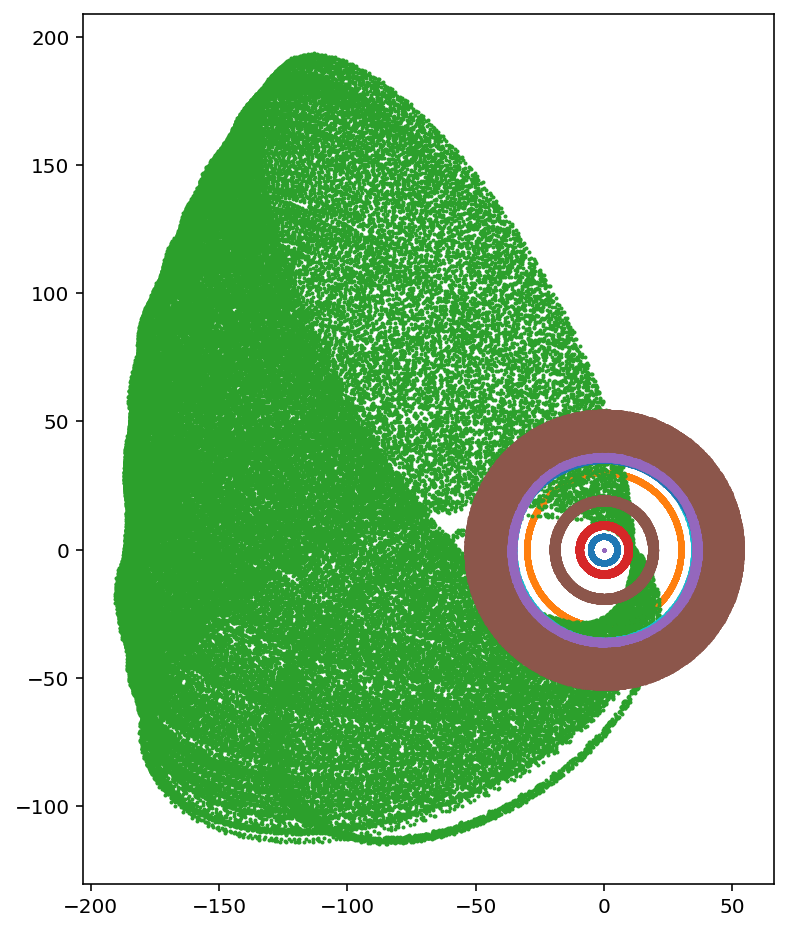

In [167]:
fig, ax = plt.subplots(figsize=(8, 8))
for name in np.unique(planets.name):
    plt.scatter(planets[planets.name == name].x, planets[planets.name == name].y, s=1)

for name in np.unique(rocks.name):
    plt.scatter(rocks[rocks.name == name].x, rocks[rocks.name == name].y, s=1)

ax.set_aspect('equal')

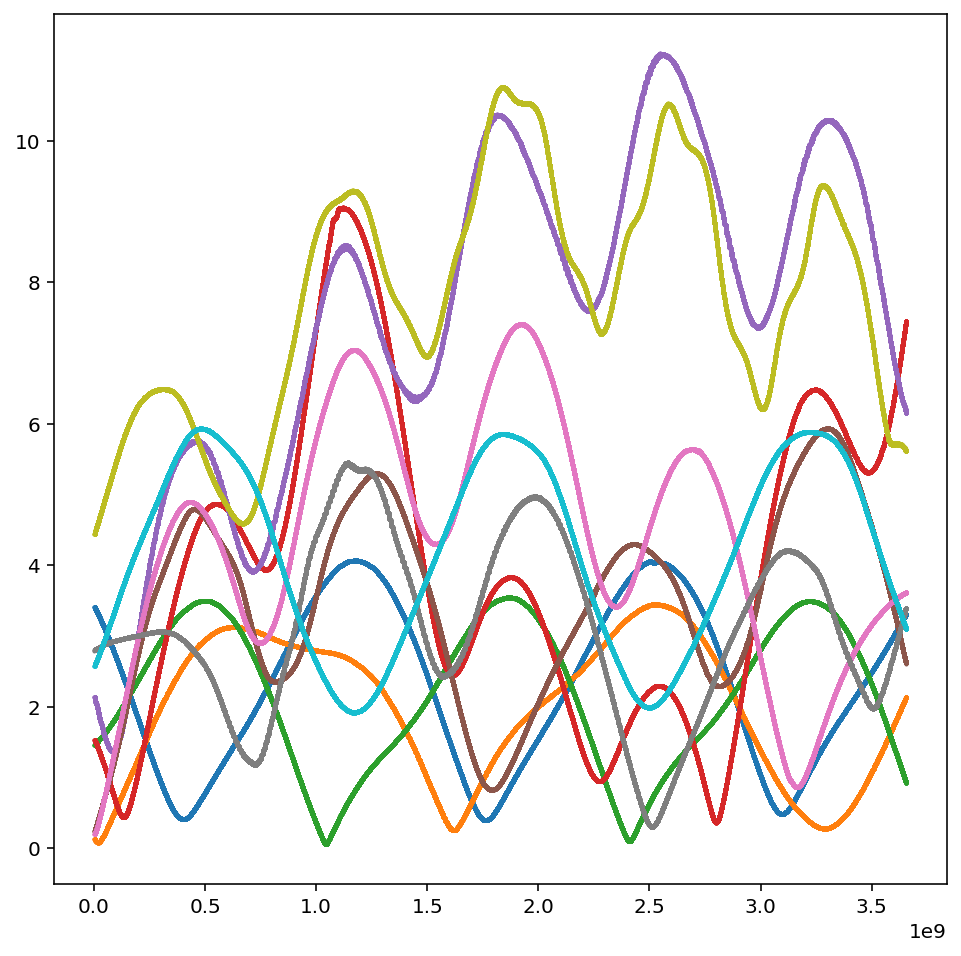

In [168]:
fig, ax = plt.subplots(figsize=(8, 8))

for name in np.unique(rocks.name):
    plt.scatter(rocks[rocks.name == name].epoch.jd, rocks[rocks.name == name].inc.deg, s=1)

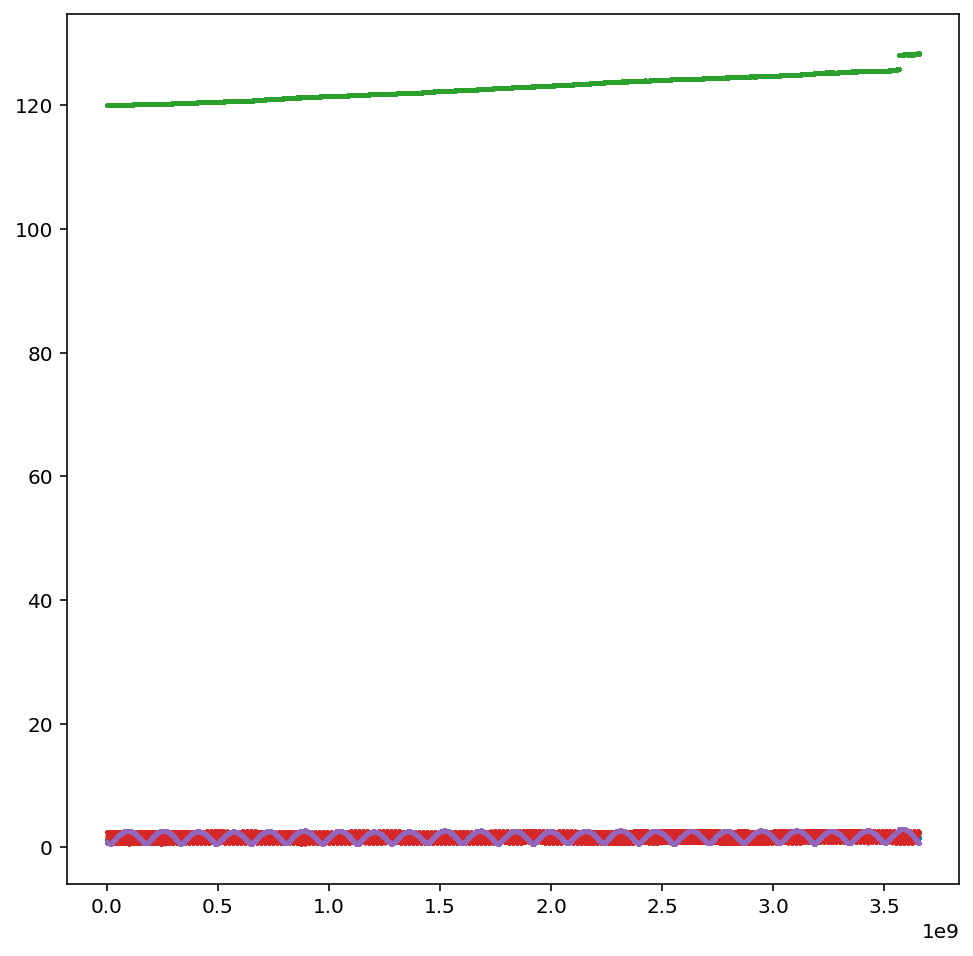

In [169]:
fig, ax = plt.subplots(figsize=(8, 8))

for name in np.unique(planets[planets.name != 'Sun'].name):
    plt.scatter(planets[planets.name == name].epoch.jd, planets[planets.name == name].inc.deg, s=1)

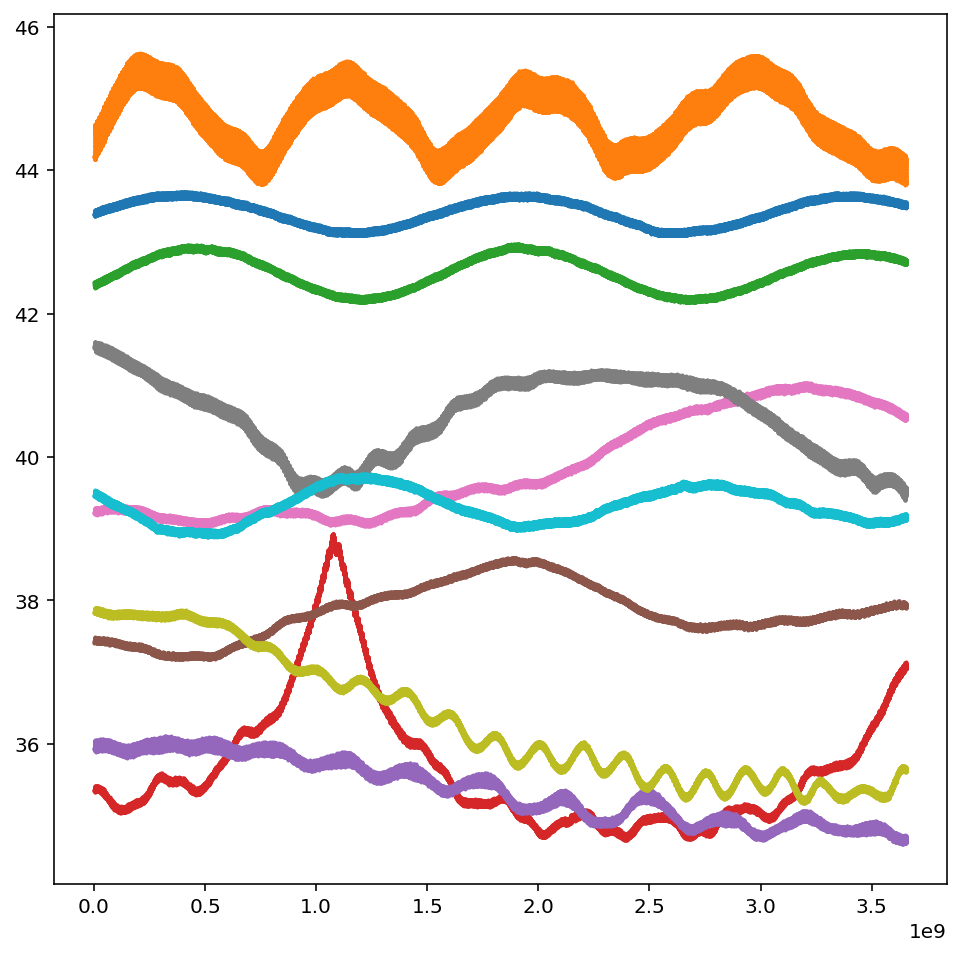

In [170]:
fig, ax = plt.subplots(figsize=(8, 8))

for name in np.unique(rocks.name):
    plt.scatter(rocks[rocks.name == name].epoch.jd, rocks[rocks.name == name].q.au, s=1)